In [9]:
from neuron.mnist import mnist_loader
import neuron.network as network


import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
from copy import deepcopy

from neuron.activation_functions import sigmoid
from neuron.mnist import stepik_original as stepik

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from neuron import vizualisation
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

np.set_printoptions(precision=5)

% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PARSE DATA

In [3]:
n = 12000
nepochs = 30
batch_size = 10

In [4]:
try:
    XX; print('already loaded')
except NameError:
    (XX, yy), (validation_XX, validation_yy), (test_XX, test_yy) =  mnist_loader.perf_load_data_wrapper()

In [5]:
n = 50000

In [6]:
(X, y), (Xvalid, yvalid), (Xtest, ytest) = (XX[0:n], yy[0:n]), (validation_XX[0:n], validation_yy[0:n]), (test_XX[0:n], test_yy[0:n])

# LEARNING
### Neuron

Initial random state: 0.1017% classified. Target: 0.21115108893253248
Epoch 0 done. Valid: 0.8153% correcly classified.
Epoch 1 done. Valid: 0.9176% correcly classified.
Epoch 2 done. Valid: 0.9298% correcly classified.
Epoch 3 done. Valid: 0.9332% correcly classified.
Epoch 4 done. Valid: 0.9357% correcly classified.
Epoch 5 done. Valid: 0.9359% correcly classified.
Epoch 6 done. Valid: 0.9383% correcly classified.
Epoch 7 done. Valid: 0.9373% correcly classified.
Epoch 8 done. Valid: 0.9362% correcly classified.
Epoch 9 done. Valid: 0.941% correcly classified.
Epoch 10 done. Valid: 0.9405% correcly classified.
Epoch 11 done. Valid: 0.943% correcly classified.
Epoch 12 done. Valid: 0.9414% correcly classified.
Epoch 13 done. Valid: 0.9422% correcly classified.
Epoch 14 done. Valid: 0.9434% correcly classified.
Epoch 15 done. Valid: 0.9422% correcly classified.
Epoch 16 done. Valid: 0.9476% correcly classified.
Epoch 17 done. Valid: 0.9447% correcly classified.
Epoch 18 done. Valid: 0.

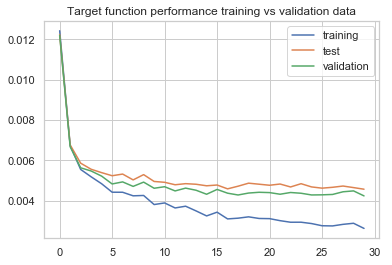

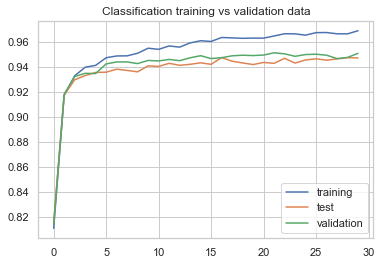

In [7]:
%%time
# n=5000 (20 sec) n=12000(25sec)
netw = network.Network([784, 30, 10])

netw.train(X, y, epochs=nepochs, batch_size=batch_size, learning_rate = 3., test_data=(Xtest, ytest), valid_data = (Xvalid, yvalid));

netw.vizualise

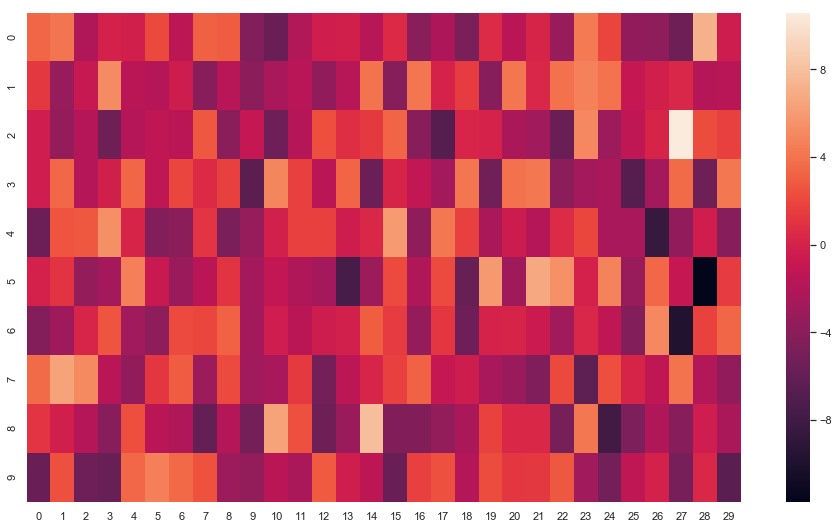

In [80]:
sns.heatmap(netw.weights[1])

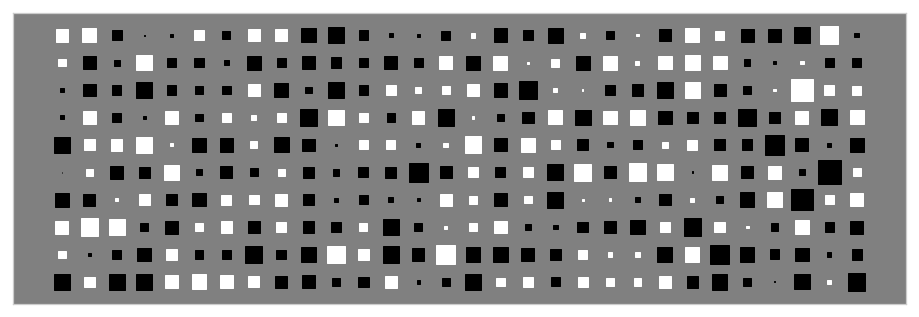

In [81]:
vizualisation.hinton(netw.weights[1].T)

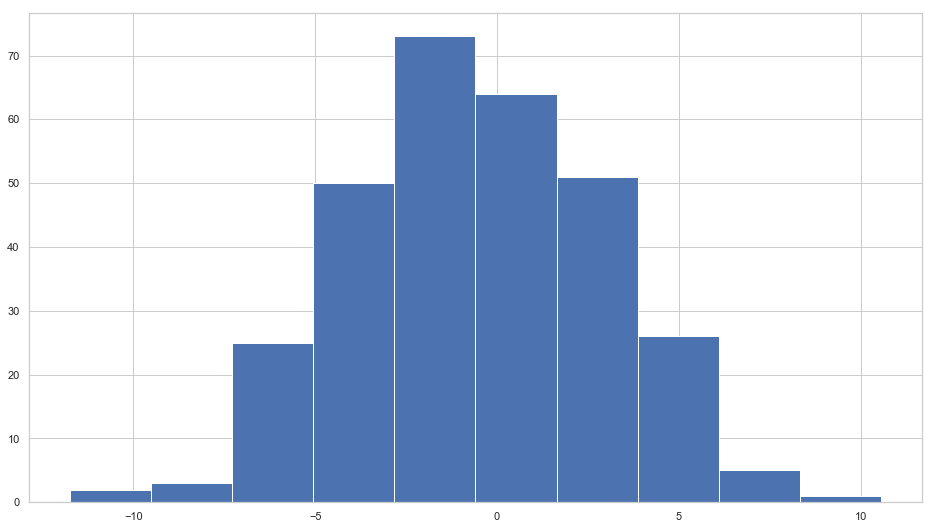

In [82]:
plt.hist(np.concatenate(netw.weights[1]));

In [148]:
netw.x = X[7].reshape(784, 1)
netw.x = np.random.randn(netw.sizes[0], 1)
netw.x = X[7].reshape(784, 1) + 2*np.random.rand(784,1)

In [151]:
answers = array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]).reshape(1,10)
netw.backpropa_input(answers);

Jstart=2.648372823207051e-05
0.0% done. Jstart=2.648372823207051e-05
0.1% done. Jstart=2.6483668836492308e-05
0.2% done. Jstart=2.6483617917605047e-05
0.3% done. Jstart=2.648357374057005e-05
0.4% done. Jstart=2.6483535020270007e-05
0.5% done. Jstart=2.648350078325501e-05
0.6% done. Jstart=2.6483470277846545e-05
0.7% done. Jstart=2.648344291382065e-05
0.8% done. Jstart=2.648341822087382e-05
0.9% done. Jstart=2.6483395819359355e-05
Jend=2.6483375399242813e-05


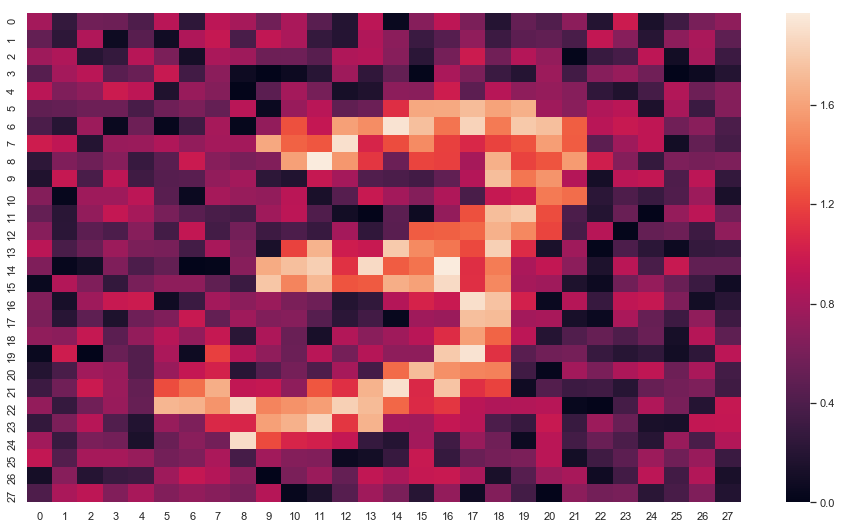

In [120]:
sns.heatmap(X[7].reshape(28, 28) + np.random.rand(28,28));

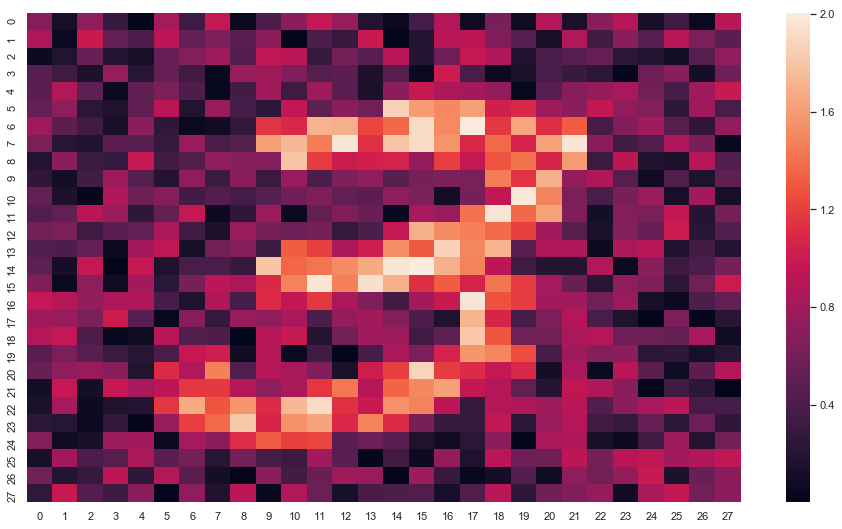

In [134]:
sns.heatmap(netw.x.reshape(28,28));

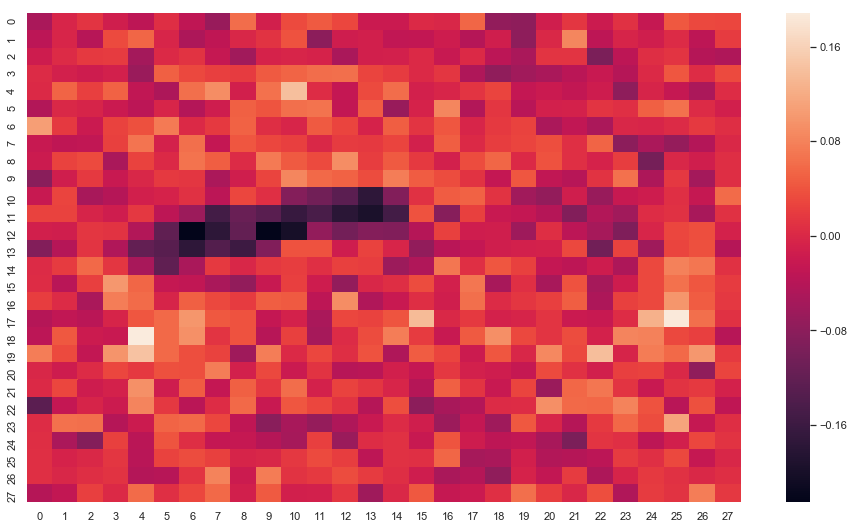

In [29]:
sns.heatmap(netw.x.reshape(28,28) - ref_x.reshape(28,28))

Piece of co

In [ ]:
def backpropa_input(self, answers, j_deriv=J_derivative):
    # self.x (784, 1)
    # fit (1 , K)
    # answers (1, K)

    print(f'Jstart={J(self.fit(self.x.T), answers)}')
    for _ in range(100000):
        if _%10000 == 0:
            print(f'{_/100000}% done. Jstart={J(self.fit(self.x.T), answers)}')

        activation = self.x
        activations = [activation]
        zs = []

        # Forward
        for w, b in zip(self.weights, self.biases): 
            z = w.dot(activation) + b
            zs.append(z)
            activation = self.activation_function(z)
            activations.append(activation)


        # Backpropas
        network_answers = activations[-1] # (K, B) and answers (K, B)
        delta = j_deriv(network_answers, answers.T) * self.activation_function_derivative(zs[-1])
        deltas = [delta]
        for L in range (2, self.nb_layers):
            delta = self.weights[-L+1].T.dot(delta) * self.activation_function_derivative(zs[-L])
            deltas = [delta] + deltas

        assert self.weights[-(L+1) + 1][0][0] == self.weights[0][0][0], f'Neuron: hmm.. should be always true L={L}'
        delta_input = self.weights[0].T.dot(delta) # no activ_deriv as we don't apply sigmoid to inputs

        # Update input
        dwdx = 3*delta_input
        self.x = self.x - dwdx
#             print('***')
#             print('delta[0]=', dwdx[0])
    print(f'Jend={J(self.fit(self.x.T), answers)}')